### <font color='#cb4154'> CS6375: Machine Learning (Spring '19) </font>
_**Instructor**: Gautam Kunapuli_ <br>
_**Due**: In class, **February 27 (Wednesday)**_

---
** SUBMITTED BY : ANIRUDH MEHROTRA**<br> 
 **  NET ID     : axm171831**

-----

# **_Homework 2_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#cb4154'>Wednesday, February 27, 2019</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#cb4154'>12:59pm Central Standard Time, Wednesday, February 27, 2019</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**. 

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade. 

---

# 1. <font color='#cb4154'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [16]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(42)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst),(X,y)

In [17]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

In [18]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst),(X,y) = generate_data(n_samples)


---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

---------------------------------------------------

**!!!! DISCUSSION ANSWER !!!!**

On increasing the value of C , the training and validation error starts to decrease till C = 100. After that it becomes constant.

From the Visualizations it can be seen that, as the value of C increases the model starts to fit the data points better and the 
Margin starts to reduce and that is beacuse the Misclassification penalty is increasing -> As per the Hinge Loss, however eventually the model 
moves to overfitting the training data and becomes less generalized.

For C = 10 The accuracy_score is : 0.65 or 65% and for C = 100 accuracy_score = 0.66 or 66% but at
C = 100 it starts to overfit.
HENCE [Cbest = 10 ; Accuracy = 65%] 

-------------------------------------

0.6666666666666666
0.6666666666666666
TRAINING ERROR
{0.001: 96.0, 0.01: 96.0, 0.1: 57.5, 1.0: 56.0, 10.0: 54.5, 100.0: 54.0, 1000.0: 54.0, 10000.0: 53.0, 100000.0: 53.0}
VALIDATION ERROR
{0.001: 24.0, 0.01: 24.0, 0.1: 14.5, 1.0: 13.5, 10.0: 13.0, 100.0: 13.0, 1000.0: 13.5, 10000.0: 13.5, 100000.0: 13.0}


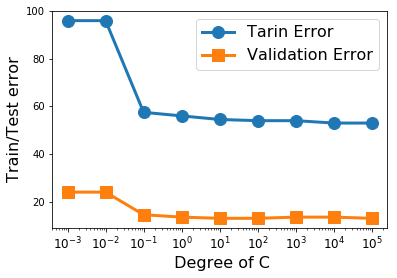

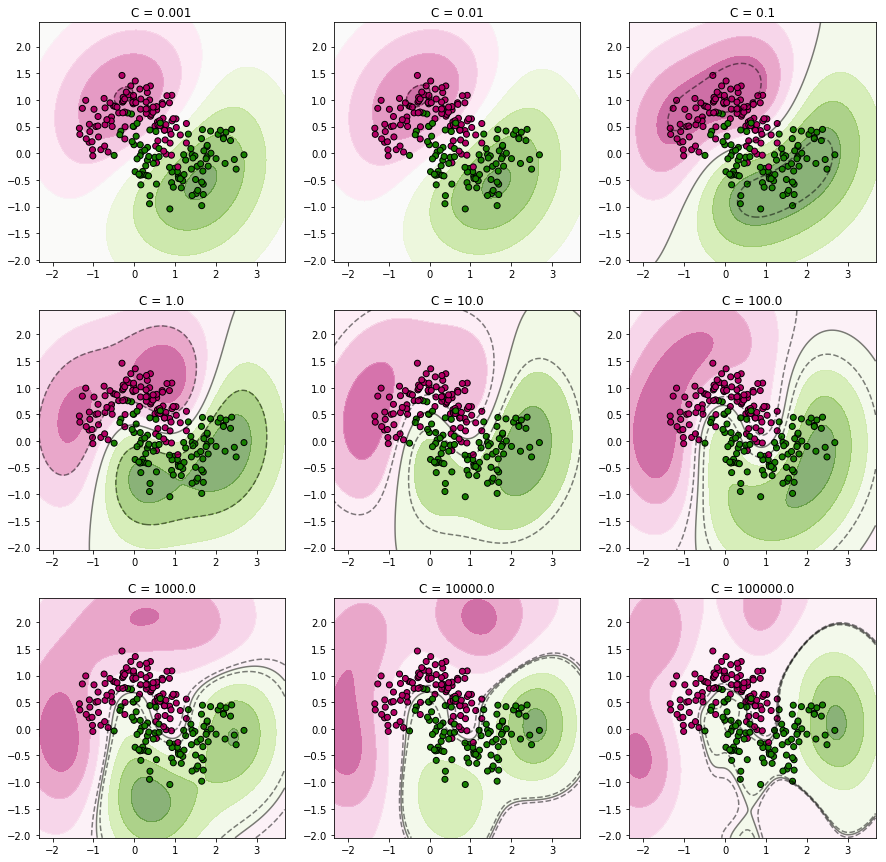

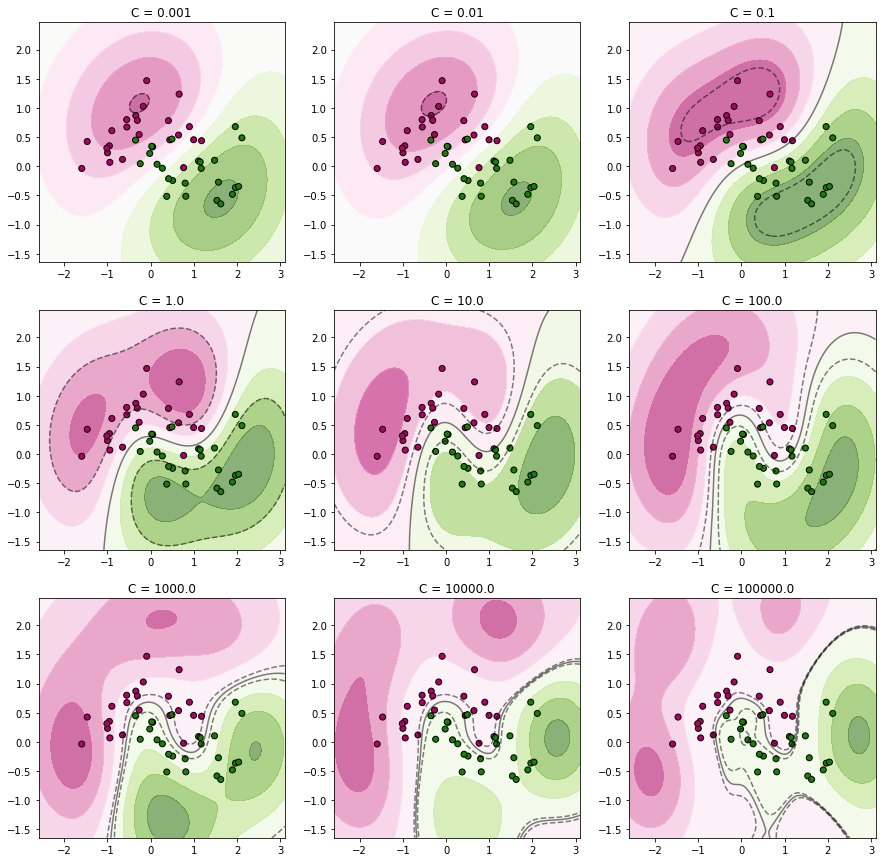

In [20]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()
trnErr2 = dict()
testaccuracy = dict()



def eval_model(y,y_pred):
    sum1=0
    for i in range(0,y.size):
        sum1  = sum1 +max(0,(1-y[i]*y_pred[i]))
        mse = sum1/2
    return mse


for C in C_values:
    clf = SVC(C,kernel='rbf',gamma='auto',random_state=42)
    models[C] = clf.fit(X_trn, y_trn)  
    y_trn_pred = clf.predict(X_trn)
    y_val_pred = clf.predict(X_val)
    
    trnErr[C] = eval_model(y_trn,y_trn_pred)
    valErr[C] = eval_model(y_val,y_val_pred)
#print(models)


    
### MODEL SELCTION #########    
clf2 = SVC(C=100,kernel='rbf',gamma = 'auto',random_state=42)
clf2.fit(X_trn,y_trn)
print(clf2.score(X_tst,y_tst))

y_test_pred = clf2.predict(X_tst)
testaccuracy = accuracy_score(y_tst,y_test_pred)
print(testaccuracy)
print('TRAINING ERROR')
print(trnErr)
print('VALIDATION ERROR')
print(valErr)

    
    
    
plt.semilogx(list(trnErr.keys()), list(trnErr.values()), marker='o', linewidth=3, markersize=12)
plt.semilogx(list(valErr.keys()), list(valErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel(' Degree of C', fontsize=16)
plt.ylabel('Train/Test error', fontsize=16)
plt.xticks(list(valErr.keys()), fontsize=12)
plt.legend(['Tarin Error', 'Validation Error'], fontsize=16)
plt.figure()
plt.show()

    
visualize(models, 'C', X_trn, y_trn)
visualize(models,'C',X_val,y_val)
plt.show()

---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

--------------------------------------

**!!!!!!! DISCUSSION ANSWER !!!!!!!**

AS per the validation error values the lowest error is obtained at "Gamma = 10", however 
the visualization depicts that the model starts to overfit at this value. This is confirmed by 
calculating the accuracy score for test set where for 

"Gamma = 10" : accuracy = 0.61 or 61% whereas "Gamma = 1" : accuracy = 0.66 or 66%

Thus Best Gamma is : Gamma = 1 and Accuracy Score = 66%

------------------------------------

0.6666666666666666
0.6666666666666666
{0.01: 115, 0.1: 114, 1.0: 108, 10.0: 104, 100.0: 101, 1000.0: 101}
{0.01: 29, 0.1: 28, 1.0: 27, 10.0: 26, 100.0: 28, 1000.0: 40}


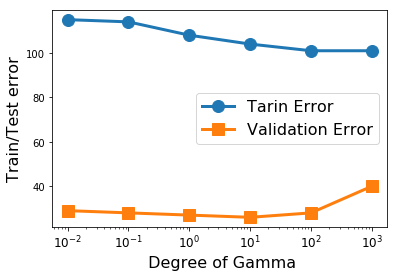

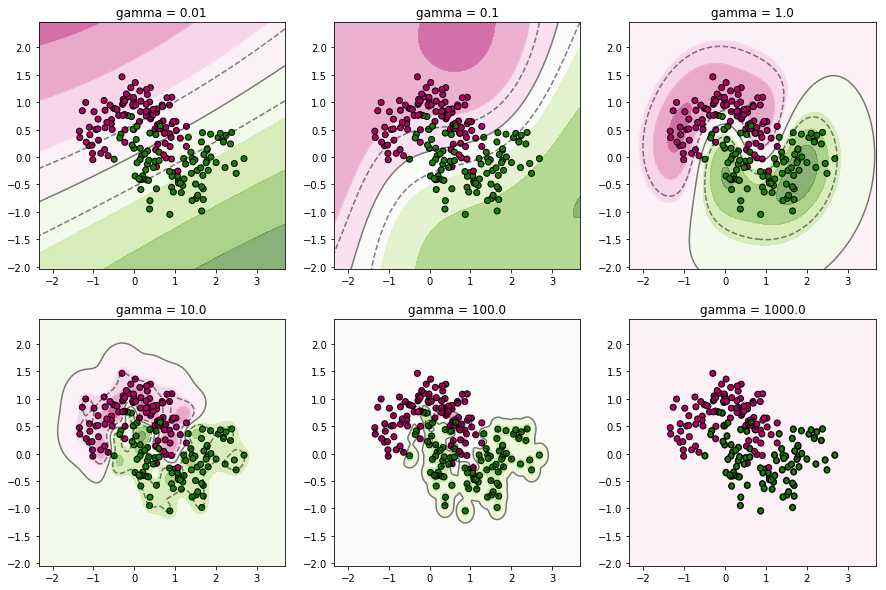

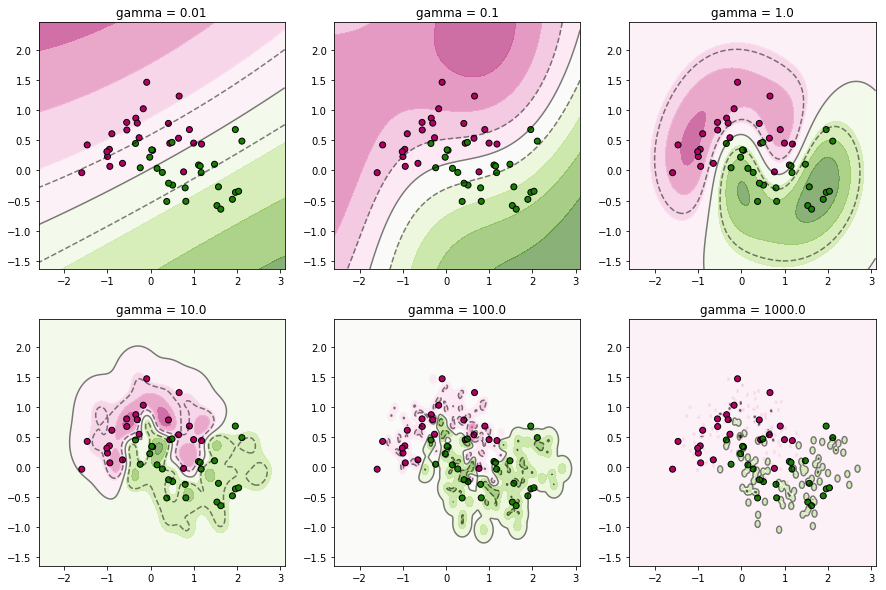

In [12]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()

def eval_model(y,y_pred):
    sum1=0
    for i in range(0,y.size):
        sum1  = sum1 +max(0,(1-y[i]*y_pred[i]))
        mse = sum1
    return mse

for G in gamma_values:
    clf2 = SVC(C=10,kernel='rbf',gamma=G)
    models[G] = clf2.fit(X_trn,y_trn)
    y_trn_pred = clf2.predict(X_trn)
    y_val_pred = clf2.predict(X_val)
    trnErr[G] = eval_model(y_trn,y_trn_pred)
    valErr[G] = eval_model(y_val,y_val_pred)

clf2 = SVC(C=10,kernel='rbf',gamma=1)
clf2.fit(X_trn,y_trn)
y_tst_pred = clf2.predict(X_tst)
print(clf2.score(X_tst,y_tst))
accuracy = accuracy_score(y_tst,y_tst_pred)
print(accuracy)

print(trnErr)
print(valErr)

plt.semilogx(list(trnErr.keys()), list(trnErr.values()), marker='o', linewidth=3, markersize=12)
plt.semilogx(list(valErr.keys()), list(valErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel(' Degree of Gamma', fontsize=16)
plt.ylabel('Train/Test error', fontsize=16)
plt.xticks(list(valErr.keys()), fontsize=12)
plt.legend(['Tarin Error', 'Validation Error'], fontsize=16)
plt.figure()
plt.show()

visualize(models, 'gamma', X_trn, y_trn)
visualize(models,'gamma',  X_val, y_val)
plt.show()
#
#
# Insert your code here to perform model selection
#
#

---
# 2. <font color='#cb4154'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [13]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
#

from prettytable import PrettyTable
import pandas as pd
train_data = pd.read_csv('wdbc_trn.csv')
test_data = pd.read_csv('wdbc_tst.csv')
val_data = pd.read_csv('wdbc_val.csv')
y_trn = np.asarray(train_data.iloc[:,0])
x_trn = np.asarray(train_data.iloc[:,1:-1])

y_tst = np.asarray(test_data.iloc[:,0])
x_tst = np.asarray(test_data.iloc[:,1:-1])

y_val = np.asarray(val_data.iloc[:,0])
x_val = np.asarray(val_data.iloc[:,1:-1])

#print(y_trn)
#print(x_trn)



Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

--------------------------
**!!!!!! DISCUSSION QUESTION ANSWER !!!!!!**

As per the Validation Error Table For different C and Gamma Values : The C and Gamma Values that return
the best Accuracy are ["Cbest = 10"] ["Gamma best = 0.01"] ["Accuracy = 97%"].

These values were choses because at these values we get a really low Validatin Error as well as Some 
training error exists indicating the model is not overfitting on training data thus ensuring 
generalization.

----------------------------

In [14]:
def eval_model(y,y_pred):
    sum1=0
    for i in range(0,y.size):
        sum1  = sum1 +max(0,(1-y[i]*y_pred[i]))
        mse = sum1/2
    #print(mse)
    return mse

bcdtrnerr = {}
bcdvalerr = {}


model = ([[]])
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

table = PrettyTable() 
table.field_names = ["C","gamma","TrnError","ValError"]
for C in C_values:
    for gam in gamma_values:
        bcdclf = SVC(C,kernel='rbf',gamma=gam,random_state=100)
        bcdclf.fit(x_trn,y_trn)
        y_train_pred = bcdclf.predict(x_trn)
        y_val_pred = bcdclf.predict(x_val)

        
        trainerror = eval_model(y_trn,y_train_pred)
        
        #bcdtrnerr[(C,gam)] = trainerror
        
        valderror = eval_model(y_val,y_val_pred)
        table.add_row([C,gam,trainerror,valderror])
        #bcdvalerr[(C,gam)] = valderror 

print(table)

bcclf2 = SVC(C=10,kernel='rbf',gamma=0.01,random_state=100)
bcclf2.fit(x_trn,y_trn)

print("Accuracy:",bcclf2.score(x_tst,y_tst))
#print(bcdvalerr)


+----------+--------+----------+----------+
|    C     | gamma  | TrnError | ValError |
+----------+--------+----------+----------+
|  0.001   |  0.01  |  125.0   |   42.0   |
|  0.001   |  0.1   |  125.0   |   42.0   |
|  0.001   |  1.0   |  125.0   |   42.0   |
|  0.001   |  10.0  |  125.0   |   42.0   |
|  0.001   | 100.0  |  125.0   |   42.0   |
|  0.001   | 1000.0 |  125.0   |   42.0   |
|   0.01   |  0.01  |  125.0   |   42.0   |
|   0.01   |  0.1   |  125.0   |   42.0   |
|   0.01   |  1.0   |  125.0   |   42.0   |
|   0.01   |  10.0  |  125.0   |   42.0   |
|   0.01   | 100.0  |  125.0   |   42.0   |
|   0.01   | 1000.0 |  125.0   |   42.0   |
|   0.1    |  0.01  |   16.0   |   8.0    |
|   0.1    |  0.1   |   11.0   |   9.0    |
|   0.1    |  1.0   |  125.0   |   42.0   |
|   0.1    |  10.0  |  125.0   |   42.0   |
|   0.1    | 100.0  |  125.0   |   42.0   |
|   0.1    | 1000.0 |  125.0   |   42.0   |
|   1.0    |  0.01  |   10.0   |   6.0    |
|   1.0    |  0.1   |   4.0    |

---
# 3. <font color='#cb4154'> **Decision Trees**</font>, 25 points. 

### a. (12 points)  Interpreting a Decision Tree (Pencil and Paper)

Consider the decision boundary in the figure below and draw the equivalent decision tree. Red circles are Class +1 and blue squares, Class -1.

![If the figure is not visible, make sure you have placed the file HW02_DecisionTrees_3a.png in the same directory as this Python notebook.](./HW02_DecisionTrees_3a.png)

---

### b. (13 points)  Visualizing a Decision Tree (Pencil and Paper)

Consider the decision tree in the figure below and draw the equivalent decision boundary. Make sure to label each decision region with the corresponding leaf node from the decision tree.

![If the figure is not visible, make sure you have placed the file HW02_DecisionTrees_3b.png in the same directory as this Python notebook.](./HW02_DecisionTrees_3b.png)

---